# Exploratory data analysis
This notebook explores the main characteristics of the bakery sales dataset used in this project.  
The goal is to understand the structure of the data, assess data quality, identify missing values, and explore relationships between sales, weather variables, and Kieler Woche.

## Imports

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Load merged dataset

In [9]:
PROJECT_ROOT = Path("..")

DATA_PATH = PROJECT_ROOT / "merged_daily_sales_weather.csv"

df = pd.read_csv(DATA_PATH, parse_dates=["Datum"])


## Dataset Overview

This dataset contains daily bakery sales observations enriched with weather information and an indicator for the Kieler Woche.

Each row corresponds to a single sales observation for a specific product group on a given day.


In [10]:
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (9334, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9334 non-null   int64         
 1   Datum                9334 non-null   datetime64[ns]
 2   Warengruppe          9334 non-null   int64         
 3   Umsatz               9334 non-null   float64       
 4   Bewoelkung           9264 non-null   float64       
 5   Temperatur           9318 non-null   float64       
 6   Windgeschwindigkeit  9318 non-null   float64       
 7   Wettercode           7009 non-null   float64       
 8   KielerWoche          9334 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 656.4 KB


## Descriptive Statistics

Basic summary statistics for numerical variables are shown below.

In [11]:
df.describe()


,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
count,9.334000e+03,9334,9334.000000,9334.000000,9264.000000,9318.000000,9318.000000,7009.000000,9334.000000
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,4.720747,12.028483,10.974780,36.900128,0.023891
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,0.000000,-8.475000,3.000000,0.000000,0.000000
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,3.000000,6.237500,8.000000,10.000000,0.000000
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,6.000000,11.625000,10.000000,28.000000,0.000000
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,7.000000,17.962500,13.000000,61.000000,0.000000
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,8.000000,31.437500,35.000000,95.000000,1.000000
std,1.512503e+05,NaN,1.489002,144.545189,2.646273,7.232829,4.131974,27.095884,0.152718


## Missing Values

This section examines the presence of missing values in the dataset.  
Missing values are expected in some weather-related variables due to incomplete measurements.

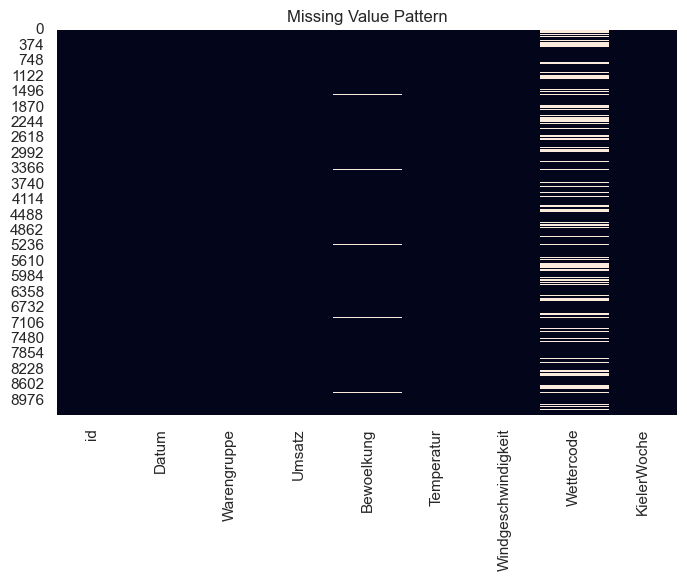

In [12]:
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Pattern")
plt.show()


## Sales Distribution

The distribution of daily sales (Umsatz) provides insight into typical revenue levels and variability.

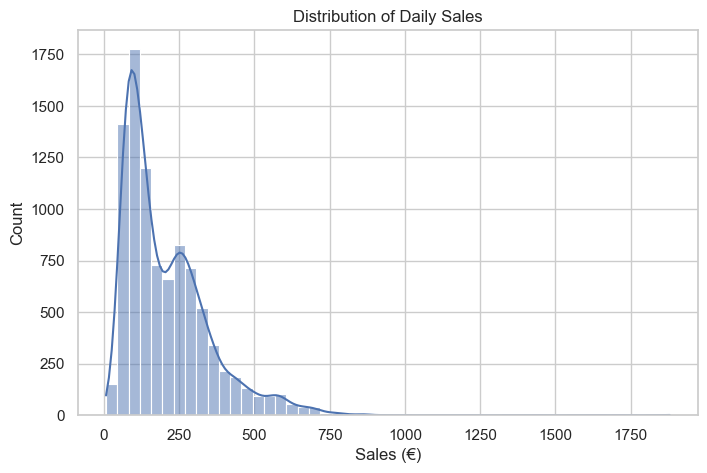

In [13]:
sns.histplot(df["Umsatz"], bins=50, kde=True)
plt.xlabel("Sales (€)")
plt.title("Distribution of Daily Sales")
plt.show()


## Sales by Product Group

Sales are grouped by product category (Warengruppe) to identify systematic differences between groups.

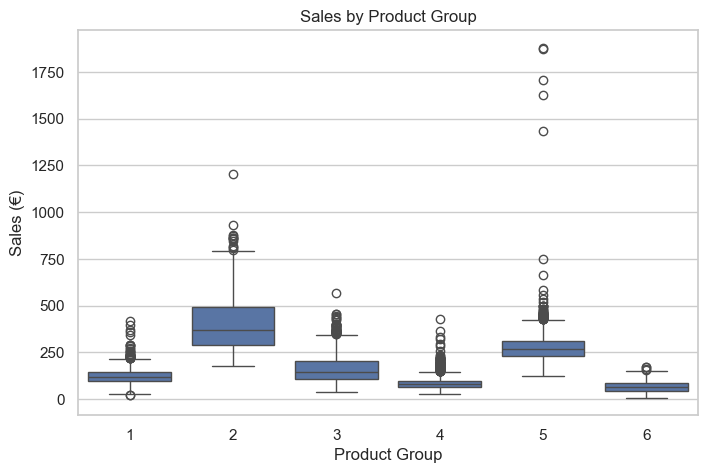

In [14]:
sns.boxplot(x="Warengruppe", y="Umsatz", data=df)
plt.xlabel("Product Group")
plt.ylabel("Sales (€)")
plt.title("Sales by Product Group")
plt.show()


## Relationship between Weather and Sales

Scatter plots are used to explore potential relationships between weather variables and bakery sales.

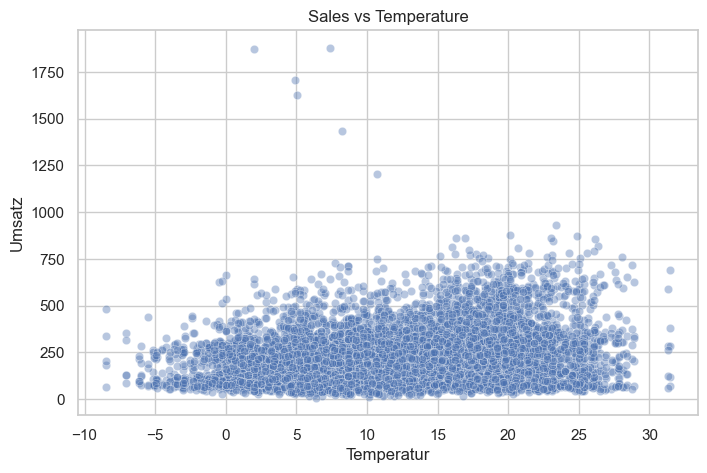

In [15]:
sns.scatterplot(x="Temperatur", y="Umsatz", data=df, alpha=0.4)
plt.title("Sales vs Temperature")
plt.show()


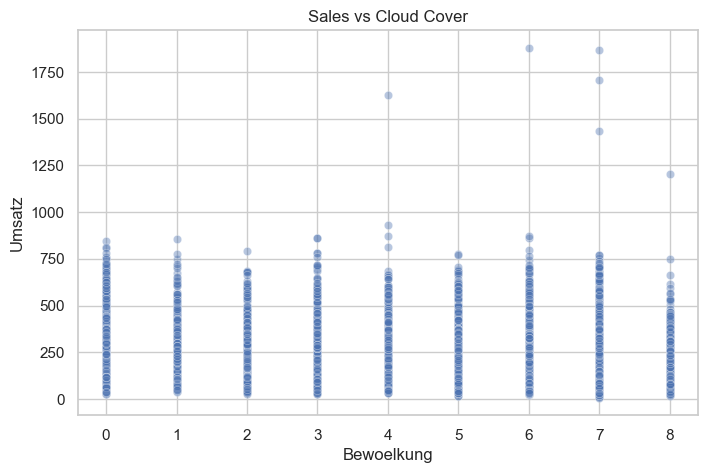

In [16]:
sns.scatterplot(x="Bewoelkung", y="Umsatz", data=df, alpha=0.4)
plt.title("Sales vs Cloud Cover")
plt.show()


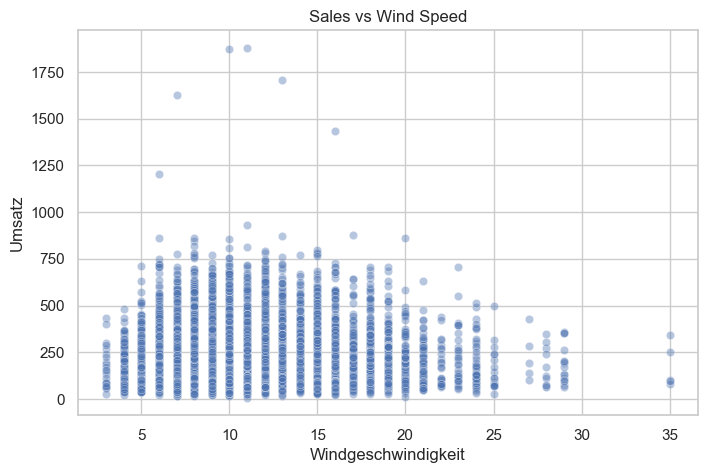

In [17]:
sns.scatterplot(x="Windgeschwindigkeit", y="Umsatz", data=df, alpha=0.4)
plt.title("Sales vs Wind Speed")
plt.show()


## Kieler Woche Effect

Kieler Woche is a major public event in Kiel and may influence bakery sales.
The following comparison examines average sales during Kieler Woche versus non-event days.

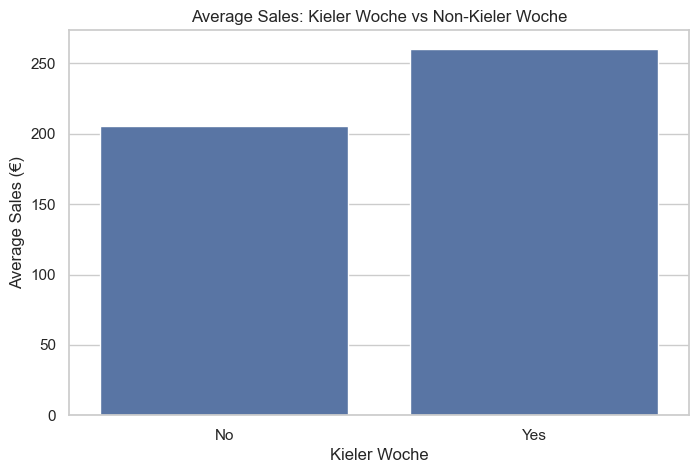

In [18]:
avg_sales_kw = (
    df.groupby("KielerWoche")["Umsatz"]
    .mean()
    .reset_index()
)

avg_sales_kw["KielerWoche"] = avg_sales_kw["KielerWoche"].map({0: "No", 1: "Yes"})

sns.barplot(x="KielerWoche", y="Umsatz", data=avg_sales_kw)
plt.xlabel("Kieler Woche")
plt.ylabel("Average Sales (€)")
plt.title("Average Sales: Kieler Woche vs Non-Kieler Woche")
plt.show()


## Correlation Analysis

Pearson correlations are computed for numerical variables to identify linear relationships.

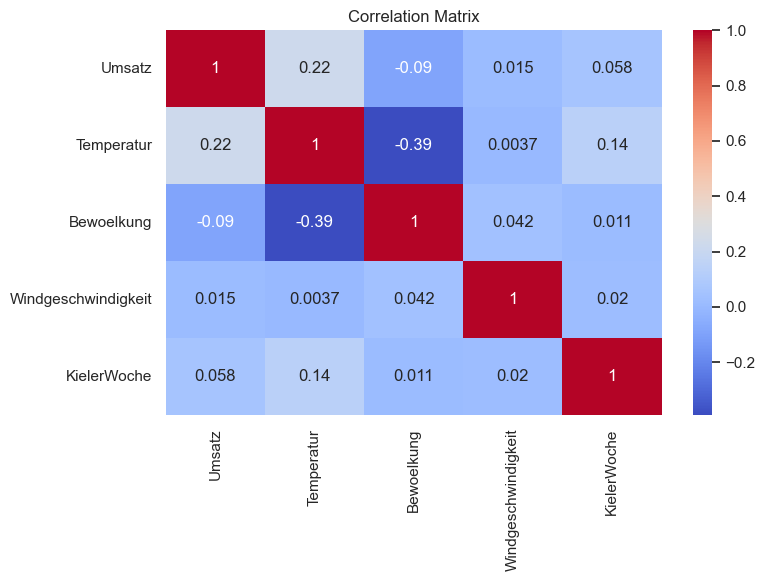

In [19]:
numeric_cols = [
    "Umsatz",
    "Temperatur",
    "Bewoelkung",
    "Windgeschwindigkeit",
    "KielerWoche"
]

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
